In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns
from sklearn import neighbors
from sklearn import ensemble

In [31]:
''' This study investigates potential associations of screen time and outdoor play (as a 
proxy for physical activity) with social skills. Cross sectional data were available for 
575 mothers with a child (54% boys) aged 2–5 years. Mothers reported their child’s screen 
time, outdoor play time and social skills'''
#https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0193700
#https://dro.deakin.edu.au/view/DU:30106962
df = pd.read_csv('stdataset.csv')
df.columns = ["ID", 'gender', 'age', 'disability', 'mothersEdu', 'allSocialSkills', 'express', 'comply', 'disrupt',
              'meetStReqs', 'meetPhysReqs', 'screenTime', 'tvTime', 'cpuTime', 'outdoorTime']
df.disability = np.where(df.disability == 'Yes', 1, 0)
df.head()

,ID,gender,age,disability,mothersEdu,allSocialSkills,express,comply,disrupt,meetStReqs,meetPhysReqs,screenTime,tvTime,cpuTime,outdoorTime
0,30208,Female,3.030801,0,3,78,38,24,12,0,0,3.000000,2.000000,1.0,1.500000
1,30400,Female,3.865845,0,3,82,39,27,10,1,1,0.000000,0.000000,0.0,4.000000
2,30863,Female,2.130048,0,3,68,35,18,11,1,0,0.857143,0.857143,0.0,1.714286
3,30530,Male,2.105407,0,3,63,29,20,12,1,0,0.500000,0.500000,0.0,1.500000
4,300057,Female,2.403833,0,3,78,38,25,11,1,0,0.357143,0.357143,0.0,1.500000


# Notes on the columns, where necessary:
- **disability**: self-reported
- **mothersEdu**: 1 means 10 years or less, 2 means 12 years or a equivalent of a trade school, and 3 means 14+ years or high education
- **allSocialSkills**: summary of the following 3 categories, all self-reported by the mother
- **express**: Mother rates their child's ability to express themself using thirteen subcategories on 3 point Likert scale. All her choices are summed
- **comply**: Mother rates their child's tendency to comply using ten subcategories on 3 point Likert scale. All her choices are summed
- **disrupt**: Mother rates their child's tendency to disrupt on seven subcategories on 3 point Likert scale. All her choices are summed
- **meetStReqs**: Whether or not this family meets the country's (AUS) screen time recommendations. this is a dichotomized version of the 3 screen time variables below
- **meetPhysReqs**: Whether or not this family meets the country's (AUS) physical activity recommendations. this is a dichotomized version of the outdoor play variable below
- **screenTime, tvTime, cpuTime, outdoorTime**: Average hours per day, reported by mother


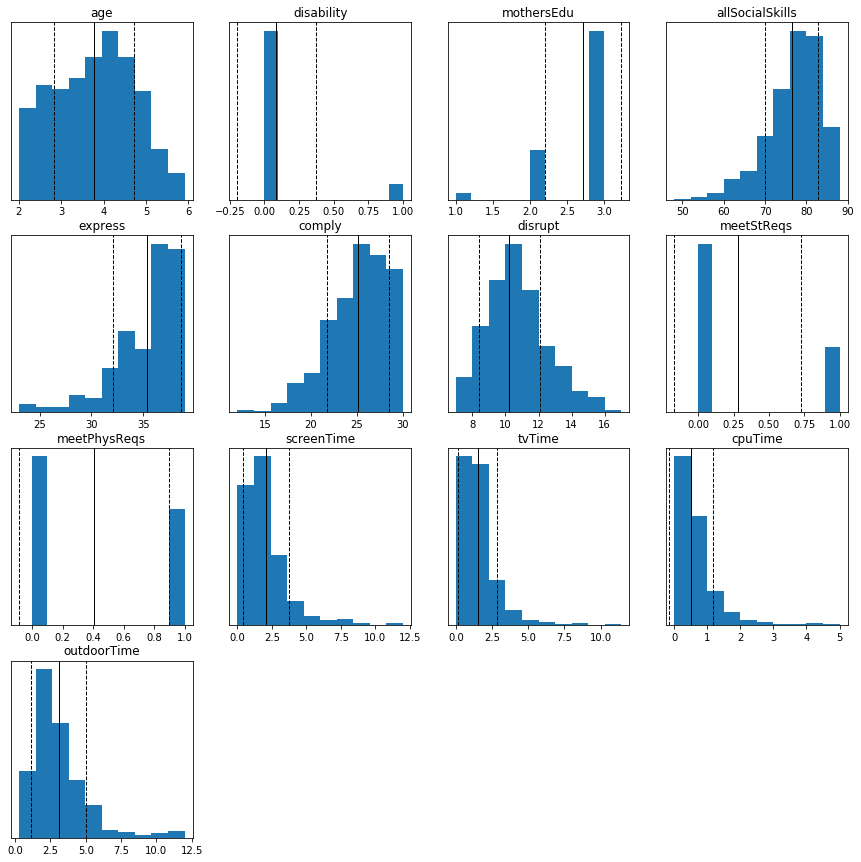

In [36]:
plt.figure(figsize=[15,15])
for j,x in enumerate(df.columns[2:]):
    plt.subplot(4,4,j+1)
    plt.hist(df[x])
    plt.axvline(df[x].mean(), color='k', linestyle='solid', linewidth=1)
    plt.axvline(df[x].mean() - df[x].std(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(df[x].mean() + df[x].std(), color='k', linestyle='dashed', linewidth=1)
    plt.yticks([])
    plt.title(x)
plt.show()

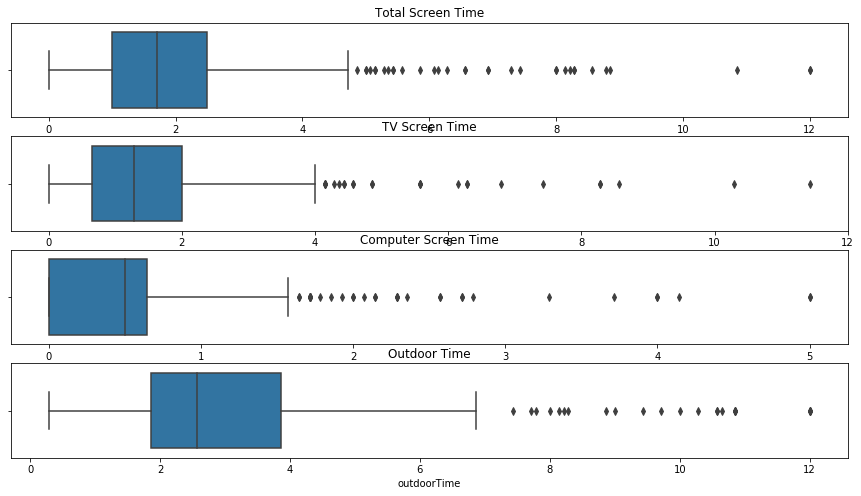

In [58]:
plt.figure(figsize=[15,8])
plt.subplot(4,1,1)
sns.boxplot(x='screenTime', data=df, orient='h')
plt.title('Total Screen Time')
plt.subplot(4,1,2)
plt.title('TV Screen Time')
sns.boxplot(x='tvTime', data=df, orient='h')
plt.subplot(4,1,3)
plt.title('Computer Screen Time')
sns.boxplot(x='cpuTime', data=df, orient='h')
plt.subplot(4,1,4)
plt.title('Outdoor Time')
sns.boxplot(x='outdoorTime', data=df, orient='h')
plt.show()

In [38]:
df.corr()['allSocialSkills']


ID                -0.043333
age                0.233644
disability        -0.166169
mothersEdu         0.007182
allSocialSkills    1.000000
express            0.810584
comply             0.878970
disrupt           -0.478303
meetStReqs         0.043760
meetPhysReqs       0.064205
screenTime        -0.071117
tvTime            -0.068313
cpuTime           -0.043249
outdoorTime        0.101425
Name: allSocialSkills, dtype: float64

In [59]:
regr = linear_model.LinearRegression()
x = df[['disability', 'mothersEdu','tvTime', 'cpuTime', 'outdoorTime']]
y = df.allSocialSkills
regr.fit(x,y)
scores = cross_val_score(regr,x,y,cv=10)
print("Fold Scores: ",scores)
print("\nAverage Score: ",np.mean(scores))

Fold Scores:  [-0.04434238 -0.0884137  -0.17036225  0.05287672  0.0059761   0.03814937
  0.03455728  0.02748817  0.02913131  0.0299505 ]

Average Score:  -0.008498887391842225


In [60]:
#statsmodels
linear_formula = 'allSocialSkills ~ disability+mothersEdu+tvTime+cpuTime+outdoorTime'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        allSocialSkills   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     5.842
Date:                Sat, 29 Dec 2018   Prob (F-statistic):           2.83e-05
Time:                        22:52:27   Log-Likelihood:                -1870.0
No. Observations:                 575   AIC:                             3752.
Df Residuals:                     569   BIC:                             3778.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      76.5702      1.600     47.855      0.000      73.427      79.713
disability     -3.7430      0.933     -4.013      0.000      -5.575      -1.911
mothersEdu     -0.1163      0.522     -0.223      0.824      -1.141       0.909
tvTime         -0.4372      0.214     -2.040      0.042      -0.858      -0.016
cpuTime        -0.3473      0.418     -0.832      0.406      -1.168       0.473
outdoorTime     0.4500      0.142      3.160      0.002       0.170       0.730
==============================================================================
Omnibus:                       46.008   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.891
Skew:                          -0.732   Prob(JB):                     1.20e-12
Kurtosis:                       3.383   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

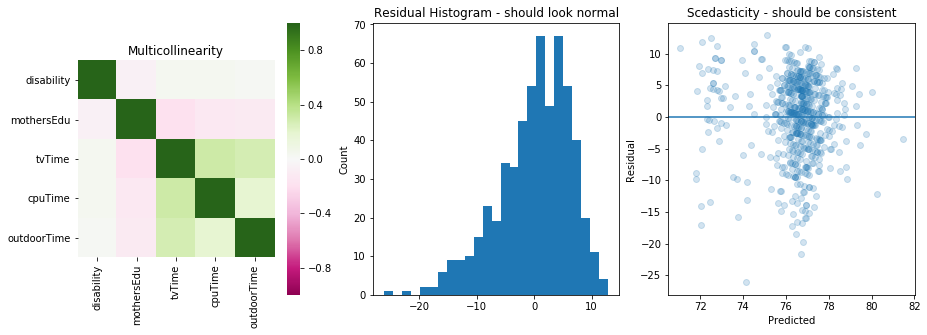

In [61]:
#Let's check how our output looks:
pred = cross_val_predict(regr,x,y,cv=5)
residual = y - pred

plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('Multicollinearity')
sns.heatmap(x.corr(), vmin = -1,square=True, cmap="PiYG")
plt.subplot(132)
plt.hist(residual, bins=25)
plt.title('Residual Histogram - should look normal')
plt.ylabel('Count')
plt.subplot(133)
plt.scatter(pred, residual, alpha=.2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Scedasticity - should be consistent')
plt.show()